In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
#file_path = "Resources/Amazon.csv"
#training_set = pd.read_csv(file_path)

2023-02-01 19:26:21.041707: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
today = datetime.now().date()
start_date = datetime(today.year - 5, today.month, today.day).date()

In [3]:
ticker_dist = {"Google": "GOOGL",
              "Microsoft":"MSFT",
              "Tesla":"TSLA",
              "Amazon":"AMZN",
              "Netflix":"NFLX",
              "Apple":"AAPL",
              "Facebook":"META"}

In [4]:
for ticker in ticker_dist:
    filepath = "Resources/"+ ticker +".csv"
    globals()[ticker] = yf.download(ticker_dist[ticker], start=start_date, end=today)
    #globals()[ticker] = pdr.get_data_yahoo(ticker_dist[ticker], start=start_date, end=today)
    globals()[ticker].index = globals()[ticker].index.date
    globals()[ticker].index.name='Date'
    globals()[ticker].index = pd.to_datetime(globals()[ticker].index)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
# Here we read all csv and store into different dataframe
for ticker in ticker_dist:
    filepath = "Resources/"+ ticker +".csv"
    globals()[ticker] = pd.read_csv(filepath, index_col=0)
    globals()[ticker].index = pd.to_datetime(globals()[ticker].index)

In [6]:
# all ticker name list for labels graph comparision 
labels=[]
for ticker in ticker_dist:
    labels.append(ticker)

In [7]:
labels

['Google', 'Microsoft', 'Tesla', 'Amazon', 'Netflix', 'Apple', 'Facebook']

In [8]:
# List of all stock companies
ticker_list = ["GOOGL","MSFT","TSLA","AMZN","NFLX","AAPL","META"]

In [9]:
Horizontal_mearged_df = yf.download(ticker_list, start=start_date, end=today,group_by="ticker")
Horizontal_mearged_df = Horizontal_mearged_df.index.date

[*********************100%***********************]  7 of 7 completed


In [10]:
company_list= [Google,Microsoft,Tesla,Amazon,Netflix,Apple,Facebook] # which is df name and data is stored
company_name=["Google","Microsoft","Tesla","Amazon","Netflix","Apple","Facebook"] # which name we want to give them

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
Merged_df = pd.concat(company_list, axis=0)
filepath= "Resources/Merged_df.csv"
Merged_df.to_csv(filepath)

In [11]:
Merged_df

,Open,High,Low,Close,Adj Close,Volume,company_name
2018-01-25,59.035500,59.250000,58.591999,59.106998,59.106998,29984000,Google
2018-01-26,59.376499,59.377998,58.401501,59.377998,59.377998,42170000,Google
2018-01-29,59.400002,59.900002,59.202999,59.324001,59.324001,31494000,Google
2018-01-30,58.886002,59.396500,58.725498,58.868500,58.868500,37338000,Google
2018-01-31,59.190498,59.316002,58.605000,59.111000,59.111000,36022000,Google
...,...,...,...,...,...,...,...
2023-01-18,135.809998,137.250000,132.800003,133.020004,133.020004,20215500,Facebook
2023-01-19,132.490005,137.449997,132.139999,136.149994,136.149994,28625200,Facebook
2023-01-20,135.889999,139.940002,134.610001,139.369995,139.369995,28643100,Facebook
2023-01-23,139.289993,143.759995,138.660004,143.270004,143.270004,27470100,Facebook


In [22]:
training_set = Merged_df.iloc[:,[4,6]]
training_set

,Adj Close,company_name
2018-01-25,59.106998,Google
2018-01-26,59.377998,Google
2018-01-29,59.324001,Google
2018-01-30,58.868500,Google
2018-01-31,59.111000,Google
...,...,...
2023-01-18,133.020004,Facebook
2023-01-19,136.149994,Facebook
2023-01-20,139.369995,Facebook
2023-01-23,143.270004,Facebook


In [40]:
training_set = Merged_df.iloc[:,[4,6]]
g_training = training_set[training_set['company_name'] == 'Google']
g_training_set = g_training.drop('company_name',axis = 1)
#g_training_set = g_training_set['Adj Close']
#g_training_set = g_training_set.set_index
g_training_set.values

array([[59.10699844],
       [59.37799835],
       [59.32400131],
       ...,
       [98.01999664],
       [99.79000092],
       [97.69999695]])

In [41]:
sc = MinMaxScaler()

training_set = sc.fit_transform(g_training_set)

In [42]:
X_train = training_set[0:1257]
y_train = training_set[1:1258]

In [43]:
X_train

array([[0.09814122],
       [0.10083492],
       [0.1002982 ],
       ...,
       [0.43553006],
       [0.48493112],
       [0.50252472]])

In [44]:
X_train = np.reshape(X_train,(1257,1,1))

In [45]:
regressor = Sequential()
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None,1)))

In [46]:
regressor.add(Dense(units=1))

In [47]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [48]:
regressor.fit(X_train, y_train, batch_size =32, epochs =200)

Epoch 1/200
40/40 [==============================] - 1s 2ms/step - loss: 0.1020
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0856
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0794
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0761
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0737
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0713
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0689
Epoch 8/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 9/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0640
Epoch 10/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0614
Epoch 11/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0587
Epoch 12/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0559
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 2ms/step - loss: 3.2344e-04
Epoch 100/200
40/40 [==============================] - 0s 2ms/step - loss: 3.2397e-04
Epoch 101/200
40/40 [==============================] - 0s 2ms/step - loss: 3.2523e-04
Epoch 102/200
40/40 [==============================] - 0s 2ms/step - loss: 3.2443e-04
Epoch 103/200
40/40 [==============================] - 0s 2ms/step - loss: 3.2512e-04
Epoch 104/200
40/40 [==============================] - 0s 2ms/step - loss: 3.2539e-04
Epoch 105/200
40/40 [==============================] - 0s 2ms/step - loss: 3.2199e-04
Epoch 106/200
40/40 [==============================] - 0s 2ms/step - loss: 3.2190e-04
Epoch 107/200
40/40 [==============================] - 0s 2ms/step - loss: 3.2488e-04
Epoch 108/200
40/40 [==============================] - 0s 2ms/step - loss: 3.2080e-04
Epoch 109/200
40/40 [==============================] - 0s 2ms/step - loss: 3.2678e-04
Epoch 110/200
40/40 [==============================] - 0s 2ms/step -

40/40 [==============================] - 0s 2ms/step - loss: 3.2128e-04
Epoch 195/200
40/40 [==============================] - 0s 2ms/step - loss: 3.2239e-04
Epoch 196/200
40/40 [==============================] - 0s 2ms/step - loss: 3.2117e-04
Epoch 197/200
40/40 [==============================] - 0s 2ms/step - loss: 3.2479e-04
Epoch 198/200
40/40 [==============================] - 0s 2ms/step - loss: 3.2332e-04
Epoch 199/200
40/40 [==============================] - 0s 2ms/step - loss: 3.1979e-04
Epoch 200/200
40/40 [==============================] - 0s 2ms/step - loss: 3.2158e-04


In [55]:
test_set = g_training_set

real_stock_price = test_set.iloc[:].values
real_stock_price
#inputs = np.reshape(inputs,(20,1,1))

array([[59.10699844],
       [59.37799835],
       [59.32400131],
       ...,
       [98.01999664],
       [99.79000092],
       [97.69999695]])

In [56]:
inputs = real_stock_price
inputs = sc.transform(inputs)

In [57]:
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

40/40 [==============================] - 0s 1ms/step


In [58]:
predicted_stock_price

array([[ 59.227795],
       [ 59.483463],
       [ 59.432484],
       ...,
       [ 98.32516 ],
       [100.154724],
       [ 97.99428 ]], dtype=float32)

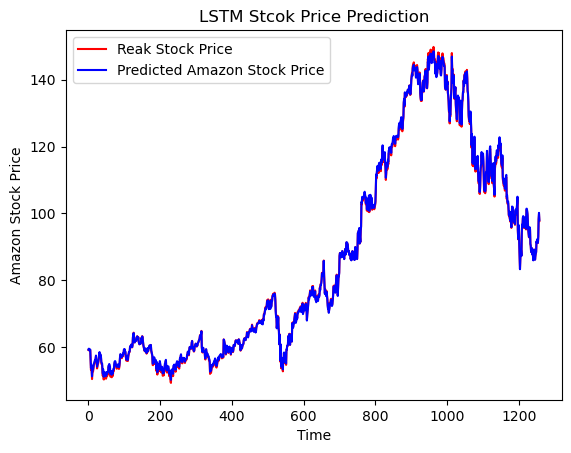

In [59]:
plt.plot(real_stock_price, color = 'red', label = 'Reak Stock Price')
plt.plot(predicted_stock_price,color = 'blue',label = 'Predicted Google Stock Price')
plt.title('LSTM Stcok Price Prediction')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()